In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [53]:
df.shape

(39644, 61)

In [54]:
df.columns=df.columns.str.replace(" ","")

# Dropping:
# 'URL' as it is a non-numeric attribute and is not valuable to our analysis 
# 'timedelta' as it is not a feature, but a non-predictive attribute
# 'n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min' as they are highly correlated attributes
df = df.drop('timedelta',axis=1)
df = df.drop('url',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

# numerical_onp  dataframe contains numerical feaures.

numerical_onp = df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)
numerical_onp = numerical_onp.drop('shares',axis=1)

# categorical_onp  dataframe contains numerical feaures.

categorical_onp = df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical_onp[:] = ss.fit_transform(numerical_onp)

def remove_outliers(array, k=1):
    ul = array.mean() + k*array.std()
    ll = array.mean() - k*array.std()
    array[array<ll] = ll
    array[array>ul] = ul
    return array

numerical_onp = numerical_onp.apply(remove_outliers)

In [55]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

##PCA


In [56]:
numerical_onp

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.757447,-0.695210,0.032772,-0.607463,-0.335566,-0.426526,-0.304268,0.156474,-1.000013,-0.374924,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.000013,0.138920
1,-0.661657,-0.618794,0.016056,-0.695709,-0.594963,-0.426526,-0.304268,0.432838,-1.000013,-0.374924,...,-0.640040,-0.870968,-0.228941,1.000013,1.000013,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,-0.661657,-0.712192,0.007645,-0.695709,-0.594963,-0.426526,-0.304268,-0.183415,-0.641015,-0.374924,...,1.000013,0.063865,0.981798,-1.000013,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,-0.661657,-0.032933,-0.012619,-0.166229,-0.854360,-0.426526,-0.304268,-0.169758,-0.117210,-0.374924,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.000013,1.000013,-0.037655,0.716237,1.000013,1.000013,-0.304268,0.159400,-0.117210,-0.374924,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.000013,-0.087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.284413,-0.425630,-0.005443,-0.166229,0.961420,-0.426526,-0.060829,-0.029747,0.406595,-0.389285,...,-0.191635,0.063865,-0.027151,-0.003726,0.075594,-0.183490,-0.562396,-0.269076,0.308055,-0.689658
39640,0.757447,-0.463838,0.042060,-0.166229,0.961420,-0.185832,1.000013,-0.169058,-0.117210,-0.389285,...,0.200881,0.573773,-0.228941,0.379044,0.420082,0.078642,0.054425,1.000013,-0.751332,1.000013
39641,-0.188622,-0.221852,-0.009050,1.000013,-0.594963,0.897288,-0.060829,0.626110,0.406595,-0.389285,...,-0.445302,0.573773,-1.000013,-0.758786,-0.957871,-0.620377,0.531059,0.244637,-1.000013,-0.087056
39642,-1.000013,0.287592,-0.002477,-0.077983,-0.594963,-0.426526,-0.304268,0.505491,-1.000013,-0.389285,...,-1.000013,-0.461978,-1.000013,0.424968,0.075594,0.996104,-0.870807,-0.269076,0.837749,-0.689658


In [57]:
from sklearn.decomposition import PCA

pca = PCA(random_state=10)
pca.fit(numerical_onp)

var = pca.explained_variance_ratio_

[ 13.03571393  24.95803629  34.50669337  43.20817119  48.77281879
  53.69105558  57.96239414  61.82633512  65.54070789  68.96971726
  72.04506442  74.78302149  77.3260271   79.65856011  81.8616853
  83.78574551  85.51794109  86.99508883  88.39956937  89.6196438
  90.83700703  92.0171384   92.96055128  93.87516643  94.76101764
  95.60526342  96.27804274  96.86185847  97.3601925   97.77801183
  98.17575357  98.53544331  98.8546593   99.09767955  99.30772713
  99.50272884  99.68405706  99.83785653  99.98122782  99.99800746
 100.        ]


Text(0, 0.5, 'cumulative explained variance')

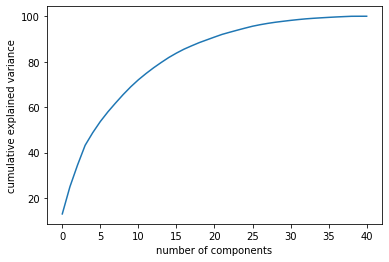

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = var.cumsum()*100
print(x)

plt.plot(x)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [59]:
from sklearn.decomposition import PCA

pca2 = PCA(random_state=10, n_components=0.95)
df_95_var = pca2.fit_transform(numerical_onp)
var2 = pca2.explained_variance_ratio_

In [60]:
from sklearn.decomposition import PCA

pca3 = PCA(random_state=10, n_components=10)
df_10_num = pca3.fit_transform(numerical_onp)
var3 = pca3.explained_variance_ratio_

In [61]:
from sklearn.decomposition import PCA

pca4 = PCA(random_state=10, n_components=15)
df_15_num = pca4.fit_transform(numerical_onp)
var4 = pca4.explained_variance_ratio_

In [62]:
from sklearn.decomposition import PCA

pca5 = PCA(random_state=10, n_components=2)
df_2_num = pd.DataFrame(pca5.fit_transform(numerical_onp))
var5 = pca5.explained_variance_ratio_

In [63]:
df_2_num['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

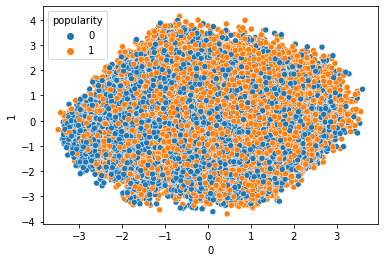

In [64]:
import seaborn as sns
sns.scatterplot(data=df_2_num, x=0, y=1, hue="popularity")

In [65]:
final_df_95_var_pca=pd.concat([pd.DataFrame(df_95_var), categorical_onp, df['shares']],axis=1)
final_df_10_num_pca=pd.concat([pd.DataFrame(df_10_num),categorical_onp, df['shares']],axis=1)
final_df_15_num_pca=pd.concat([pd.DataFrame(df_15_num),categorical_onp, df['shares']],axis=1)




In [67]:
final_df_10_num_pca

,0,1,2,3,4,5,6,7,8,9,...,weekday_is_saturday,weekday_is_sunday,is_weekend,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,shares
0,0.464646,0.017921,0.447156,-1.471809,0.195606,2.731764,-0.750613,0.514283,-0.462824,-0.600277,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,593
1,-0.181025,-2.613542,-0.315868,-0.408460,-0.516286,1.399491,-0.381415,-0.111885,1.676404,-0.215498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,711
2,1.720874,-0.846957,-2.296810,-0.298882,0.458138,2.177389,0.527992,0.501345,-0.446881,-0.159036,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1500
3,-1.047855,-0.606391,-1.634075,-0.917819,0.688749,1.625169,-0.292074,-0.201273,-0.129026,0.961379,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1200
4,2.658288,0.207935,-1.161248,-1.969296,-0.850587,-0.660407,0.211750,-0.229480,-0.431691,-0.682515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.051625,-0.296898,-0.138327,1.030532,-0.333389,-0.620674,1.265883,0.470117,-1.367535,-0.499113,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1800
39640,1.609214,0.533944,1.441143,0.233638,0.544149,-0.338649,-0.233730,-0.402848,-0.778067,0.588257,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1900
39641,-1.215700,2.263068,1.055368,0.288921,0.974389,-0.474187,0.176224,1.419988,-0.119883,0.468428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
39642,-3.154642,-1.290601,-0.325661,-0.694555,-0.779504,0.062920,-0.307432,-0.416572,0.900759,0.862534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1100
